In [2]:
import pandas as pd  #for loading data file like csv, xlsx

# DATA CLEANING FROM KAGGLE FOR INDIA

In [9]:
# Let's import data and visualize.
data = pd.read_csv("Original_Data/kaggle_covid_19_india.csv",delimiter = ",")
data.head(10)#visualize data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [10]:
#col_names = data.columns
#data['Date']
#Data = data.sort_values(by = 'Date')#,inplace = True to not show the sorting.
#Data = Data.loc[]
#pd.to_datetime(data.Date)
#data['Date'].dt.strftime('%d/%m/%Y')
#Data.head(10)

In [11]:
l = ['Date','State/UnionTerritory','Cured','Deaths','Confirmed']
Data = data.loc[:,l]
Data.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [12]:
Data['Date'] = pd.to_datetime(Data['Date'],format='%d/%m/%y')#format gives the present form of date and to_datetime
# converts it into american form i.e. YYYY-mm-dd
Data = Data.sort_values(by='Date')# sort_values has come instead of sort.
Data.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [13]:
Data_new = pd.DataFrame(columns = ['Date','Infected','Recovered','Deaths'])
for t,i in Data.groupby(Data['Date']):
    I = pd.DataFrame.sum(i.loc[:,'Confirmed'])#sum all confirmed cases in date = t
    R = pd.DataFrame.sum(i.loc[:,'Cured'])#sum all recovered cases in date = t
    D = pd.DataFrame.sum(i.loc[:,'Deaths'])#sum all death cases in date = t
    Data_new = Data_new.append({'Date':t,'Infected':I,'Recovered':R,'Deaths':D},ignore_index=True)

#Let's change cum-sum and view our data
#Commented out because by doing inverse of cum-sum we are removing out the infected individuals from just day before
#like we are assuming that they get cured in one day which is not in real.
#Temp_data = Data_new.loc[:,['Infected','Recovered','Deaths']].diff()# this is to remove cum-sum
#Data_new.loc[1:,['Infected','Recovered','Deaths']]=Temp_data.loc[1:,['Infected','Recovered','Deaths']]
#Data_new.columns = ['Date','New_Infected','New_Recovered','New_Deaths']
#Data_new.tail(10)

In [14]:
# TIme to dump the cleaned Data for COVID-19 cases in India to a csv file.
Data_new.to_csv("Data/Kaggle_Covid_19_India_cleaned.csv",encoding = 'utf-8')

# DATA CLEANING from KAGGLE for CHINA, US, UK, ITALY, RUSSIA, QATAR,  WORLD

In [3]:
#Load the data
data1 = pd.read_csv('Original_Data/kaggle_covid_19_data.csv',sep = ',')
data1.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [37]:
# Let's collect the necessary columns and leave the rest.

l = ['Country/Region','ObservationDate','Confirmed','Deaths','Recovered']
data1 = data1.loc[:,l]
#data1 = data1.fillna(0)#filling the places with NaN with 0.
data1['ObservationDate'] = pd.to_datetime(data1['ObservationDate']).dt.date#.dt.date changes date-time format to date if there are any.
data1.head(5)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Mainland China,2020-01-22,1.0,0.0,0.0
1,Mainland China,2020-01-22,14.0,0.0,0.0
2,Mainland China,2020-01-22,6.0,0.0,0.0
3,Mainland China,2020-01-22,1.0,0.0,0.0
4,Mainland China,2020-01-22,0.0,0.0,0.0


We will clean data for 5 countries: USA, Russia, Italy, United Kingdom, China until 30th May.

In [38]:
lst = ['Mainland China','US','Russia','Italy','UK','Spain','Peru','Chile','Qatar']
for i in lst:
    Data_NEW = pd.DataFrame(columns=['Date','Infected','Deaths','Recovered'])# empty dataframe
    data_new = data1[data1['Country/Region'].str.contains(i,case=False)]#also we can do as follows
    #search_values = ['ville','Aura'];df[df.name.str.contains('|'.join(search_values ))]=this actually sort data by country values
    data_new = data_new.loc[:,['ObservationDate','Confirmed','Deaths','Recovered']]#remove country/region column
    data_new.columns = ['Date','Infected','Deaths','Recovered']#renaming columns
    for t,r in data_new.groupby(data_new['Date']):
        I = pd.DataFrame.sum(r.loc[:,'Infected'])#sum of all cases on date=t
        D = pd.DataFrame.sum(r.loc[:,'Deaths'])#sum of all cases on date=t
        R = pd.DataFrame.sum(r.loc[:,'Recovered'])#sum of all cases on date=t
        #A = pd.DataFrame.sum(r.loc[:,'Active'])#sum of all cases on date=t
        Data_NEW = Data_NEW.append({'Date':t,'Infected':I,'Deaths':D,'Recovered':R},ignore_index=True)
    #Commented out because by doing inverse of cum-sum we are removing out the infected individuals from just day before
    #like we are assuming that they get cured in one day which is not in real.
    #temp_data = Data_NEW.loc[:,['Infected','Deaths','Recovered']].diff()#this is done to not to lose info on first row
    # .diff() is done to remove the cum-sum in columns
    #Data_NEW.loc[1:,['Infected','Deaths','Recovered']]=temp_data.loc[1:,:]
    #Data_NEW.columns = ['Date','New_Infected','New_Deaths','New_Recovered']
    Data_NEW.to_csv('Data/Kaggle_Covid_19_'+i+'_cleaned.csv',encoding='utf-8')

Now let's clean for world data.

In [39]:
data_world = pd.DataFrame(columns=['Date','Infected','Deaths','Recovered'])
for t,b in data1.groupby(data1['ObservationDate']):
    I = pd.DataFrame.sum(b.loc[:,'Confirmed'])#sum of all cases on date=t
    D = pd.DataFrame.sum(b.loc[:,'Deaths'])#sum of all cases on date=t
    R = pd.DataFrame.sum(b.loc[:,'Recovered'])#sum of all cases on date=t
    data_world = data_world.append({'Date':t,'Infected':I,'Deaths':D,'Recovered':R},ignore_index=True)
#Commented out because by doing inverse of cum-sum we are removing out the infected individuals from just day before
#like we are assuming that they get cured in one day which is not in real.
#t_data = data_world.loc[:,['Infected','Deaths','Recovered']].diff()
#data_world.loc[1:,['Infected','Deaths','Recovered']] = t_data.loc[1:,:]
#data_world.columns = ['Date','New_Infected','New_Deaths','New_Recovered']
data_world.to_csv('Data/Kaggle_Covid_19_world_cleaned.csv',encoding='utf-8')

In [14]:
## Let's make data for "New York"
l = ['Province/State','ObservationDate','Confirmed','Deaths','Recovered']
data1_n = data1.loc[:,l]
#data1 = data1.fillna(0)#filling the places with NaN with 0.
data1_n['ObservationDate'] = pd.to_datetime(data1_n['ObservationDate']).dt.date#.dt.date changes date-time format to date if there are any.
data1_n.head(5)

,Province/State,ObservationDate,Confirmed,Deaths,Recovered
0,Anhui,2020-01-22,1.0,0.0,0.0
1,Beijing,2020-01-22,14.0,0.0,0.0
2,Chongqing,2020-01-22,6.0,0.0,0.0
3,Fujian,2020-01-22,1.0,0.0,0.0
4,Gansu,2020-01-22,0.0,0.0,0.0


In [15]:
## For "New York"
data1_n = data1_n.fillna('NA')
data1_nn = data1_n[data1_n['Province/State'].str.contains('New York',case=False)]
data1_nn = data1_nn.loc[:,['ObservationDate','Confirmed','Deaths','Recovered']]
data1_nn.to_csv('Data/Kaggle_Covid_19_NY_cleaned.csv',encoding='utf-8')

## Let's see how data looks obtained from https://ourworldindata.org/coronavirus-source-data

In [20]:
data_owid = pd.read_csv("Original_Data/owid-covid-data.csv",sep=',')
data_owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24944,OWID_WRL,NaN,World,2020-06-17,8141722.0,141305.0,445380.0,6851.0,1044.507,18.128,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
24945,OWID_WRL,NaN,World,2020-06-18,8318148.0,176426.0,450630.0,5250.0,1067.141,22.634,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
24946,OWID_WRL,NaN,World,2020-06-19,8456815.0,138667.0,456956.0,6326.0,1084.931,17.790,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
24947,OWID_WRL,NaN,World,2020-06-20,8634087.0,177272.0,461982.0,5026.0,1107.673,22.742,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58


In [33]:
## 'Italy','Chile','United Kingdom','Peru','Qatar'
## put and check for each country.
data_owid1 = data_owid[data_owid['location'].str.contains('United Kingdom',case=False)]
data_owid1 = data_owid1.loc[:,['date','total_cases','total_deaths','population']]
data_owid1

,date,total_cases,total_deaths,population
23551,2019-12-31,0.0,0.0,67886004
23552,2020-01-01,0.0,0.0,67886004
23553,2020-01-02,0.0,0.0,67886004
23554,2020-01-03,0.0,0.0,67886004
23555,2020-01-04,0.0,0.0,67886004
...,...,...,...,...
23720,2020-06-17,298136.0,41969.0,67886004
23721,2020-06-18,299251.0,42153.0,67886004
23722,2020-06-19,300469.0,42288.0,67886004
23723,2020-06-20,301815.0,42461.0,67886004


Text(0.5, 0, 't')

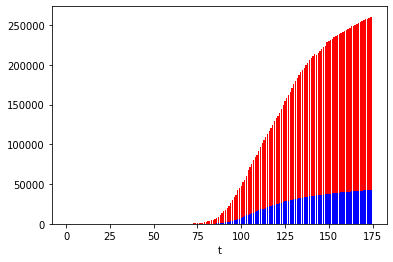

In [35]:
import matplotlib.pyplot as plt
data_owid1['active'] = data_owid1.loc[:,'total_cases']-data_owid1.loc[:,'total_deaths']
T = [x for x in range(1,len(data_owid1)+1)]
plt.bar(T,data_owid1['active'],color='r')
plt.bar(T,data_owid1['total_deaths'],color='b')
plt.xlabel('t')